In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv("trabalho.csv")


df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month.astype(int)


Faturamento por mês:
   month  total_revenue
0      1          78222
1      2          55402


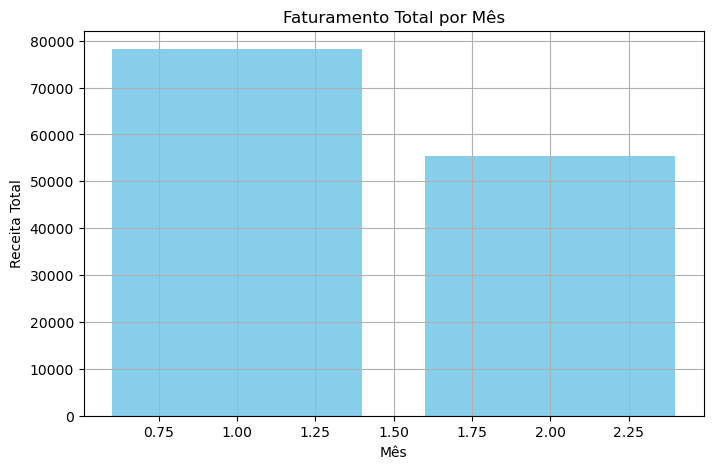

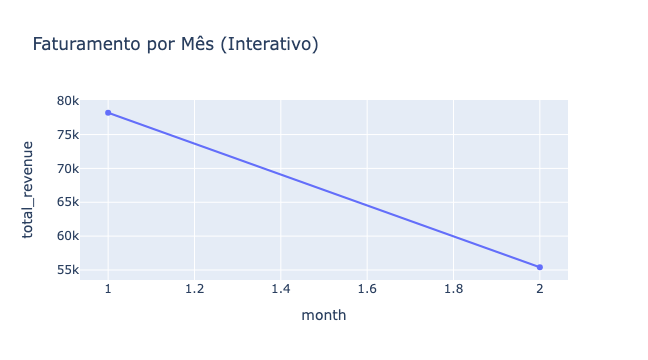

In [23]:
monthly_revenue = df.groupby('month')['total_revenue'].sum().reset_index()

print("Faturamento por mês:")
print(monthly_revenue)

plt.figure(figsize=(8,5))
plt.bar(monthly_revenue['month'], monthly_revenue['total_revenue'], color='skyblue')
plt.title('Faturamento Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.grid(True)
plt.show()

fig = px.line(monthly_revenue, x='month', y='total_revenue', markers=True, title='Faturamento por Mês (Interativo)')
fig.show()


Top 10 Combinações Restaurante + Prato:
                          restaurant_dish  total_revenue
782                  Jackson Group - join            332
739   Hodges, Thornton and Ray - identify            329
1453                    Ryan Group - fill            294
706                  Herrera-Smith - main            273
940       Luna, Rodgers and Larson - even            216
469      Evans, Holmes and Howell - front            209
1276                  Peters Ltd - factor            206
740       Hodges, Thornton and Ray - join            206
665                Hartman Inc - daughter            205
858      Jones, Johnson and Garcia - take            200


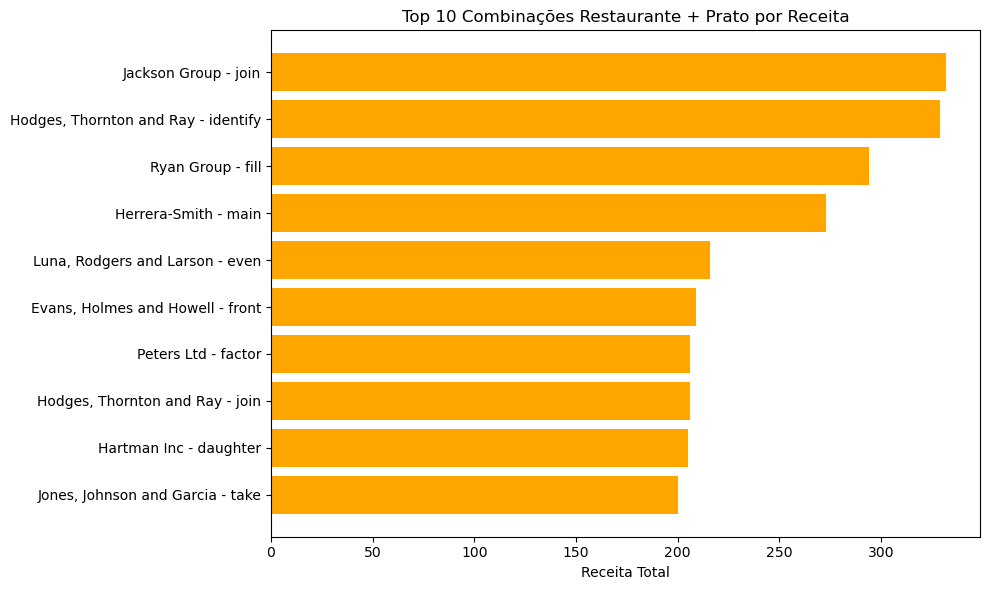

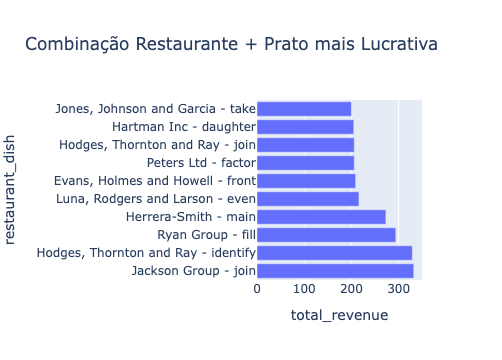

In [18]:
combo_revenue = df.groupby('restaurant_dish')['total_revenue'].sum().reset_index().sort_values(by='total_revenue', ascending=False).head(10)

print("Top 10 Combinações Restaurante + Prato:")
print(combo_revenue)

plt.figure(figsize=(10,6))
plt.barh(combo_revenue['restaurant_dish'], combo_revenue['total_revenue'], color='orange')
plt.title('Top 10 Combinações Restaurante + Prato por Receita')
plt.xlabel('Receita Total')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

fig = px.bar(combo_revenue, x='total_revenue', y='restaurant_dish', orientation='h', title='Combinação Restaurante + Prato mais Lucrativa')
fig.show()

Preço médio por categoria:
    category  price_per_unit
0  Appetizer       27.991004
1    Dessert       26.297376
2       Main       26.287481


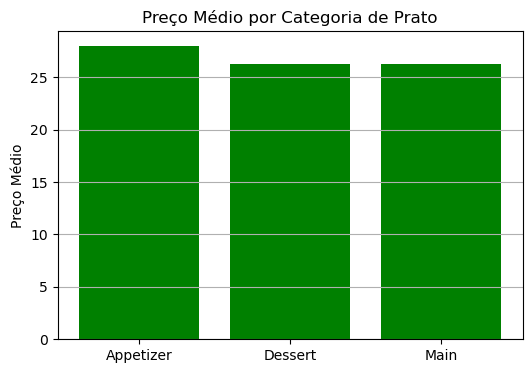

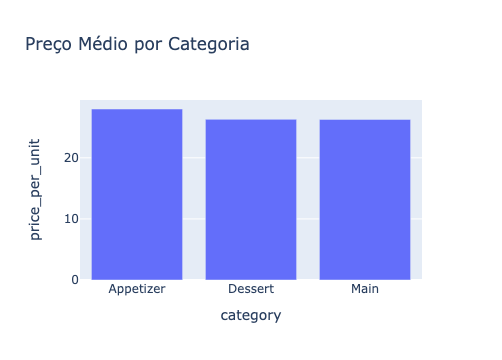

In [19]:
avg_price_cat = df.groupby('category')['price_per_unit'].mean().reset_index()

print("Preço médio por categoria:")
print(avg_price_cat)

plt.figure(figsize=(6,4))
plt.bar(avg_price_cat['category'], avg_price_cat['price_per_unit'], color='green')
plt.title('Preço Médio por Categoria de Prato')
plt.ylabel('Preço Médio')
plt.grid(axis='y')
plt.show()

fig = px.bar(avg_price_cat, x='category', y='price_per_unit', title='Preço Médio por Categoria')
fig.show()

Resumo por tipo de cozinha:
   cuisine  quantity  total_revenue
0  Chinese      1323          35791
1   Indian      1277          34919
2  Italian      1106          29771
3  Mexican      1267          33143


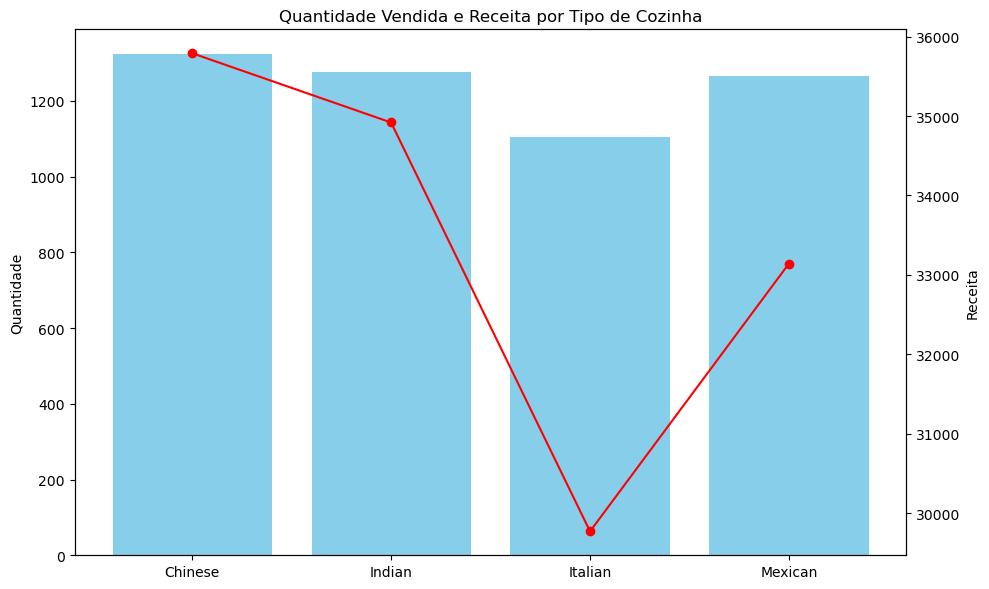

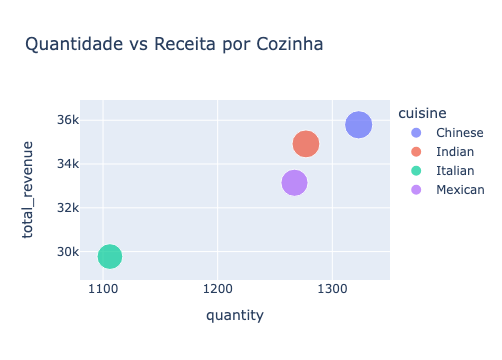

In [20]:
cuisine_data = df.groupby('cuisine').agg({'quantity': 'sum', 'total_revenue': 'sum'}).reset_index()

print("Resumo por tipo de cozinha:")
print(cuisine_data)

fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()
ax1.bar(cuisine_data['cuisine'], cuisine_data['quantity'], color='skyblue', label='Quantidade')
ax2.plot(cuisine_data['cuisine'], cuisine_data['total_revenue'], color='red', marker='o', label='Receita')

ax1.set_ylabel('Quantidade')
ax2.set_ylabel('Receita')
ax1.set_title('Quantidade Vendida e Receita por Tipo de Cozinha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig = px.scatter(cuisine_data, x='quantity', y='total_revenue', size='total_revenue',
                 color='cuisine', hover_name='cuisine', title='Quantidade vs Receita por Cozinha')
fig.show()

Média de avaliação por parceiro:
                partner_name  rating
20             Miller-Graham     4.9
7   Edwards, Young and Lynch     4.8
29              Sullivan-Lee     4.7
18              Mcdonald Inc     4.7
5             Diaz-Hernandez     4.7
27               Stark-Velez     4.5
14                Koch-Lewis     4.5
1            Carson and Sons     4.4
12              Hamilton PLC     4.3
10              Garner-Russo     4.2


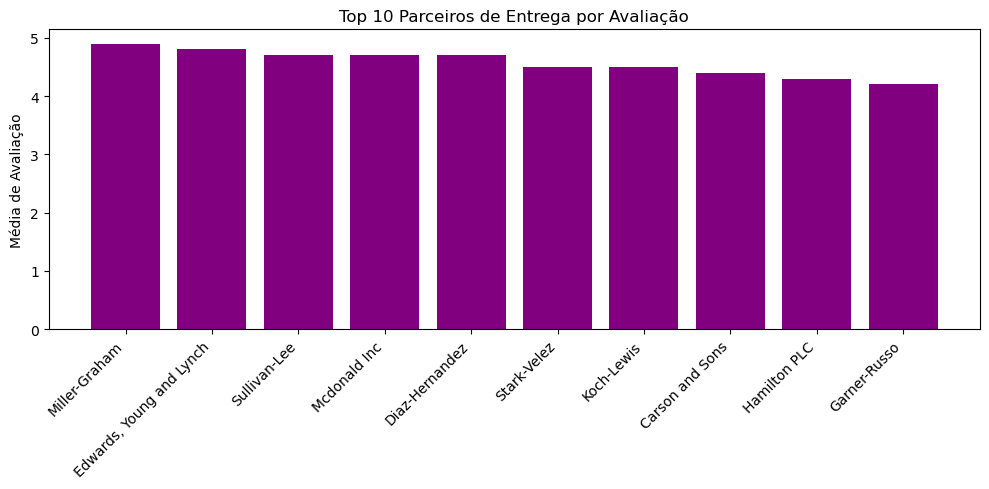

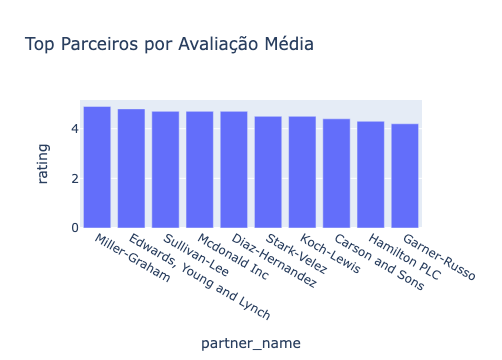

In [14]:
partner_ratings = df.groupby('partner_name')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

print("Média de avaliação por parceiro:")
print(partner_ratings.head(10))

top_partners = partner_ratings.head(10)
plt.figure(figsize=(10,5))
plt.bar(top_partners['partner_name'], top_partners['rating'], color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Parceiros de Entrega por Avaliação')
plt.ylabel('Média de Avaliação')
plt.tight_layout()
plt.show()

fig = px.bar(top_partners, x='partner_name', y='rating', title='Top Parceiros por Avaliação Média')
fig.show()


Top 10 Restaurantes por Receita:
                        restaurant_name  total_revenue
178                     Murphy and Sons           1310
284                          Wilson PLC           1217
257                     Torres and Sons           1172
101  Hernandez, Fitzgerald and Thompson           1109
204                    Ponce-Montgomery           1085
108            Hodges, Thornton and Ray           1067
122                    Jenkins and Sons           1059
84                       Grant-Phillips            955
283                          Wilson Inc            936
263           Vargas, Nelson and Thomas            918


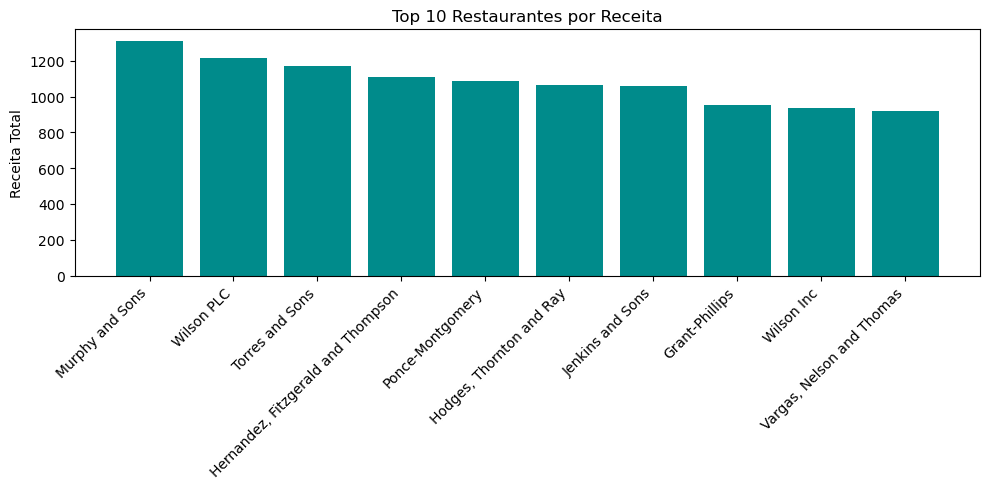

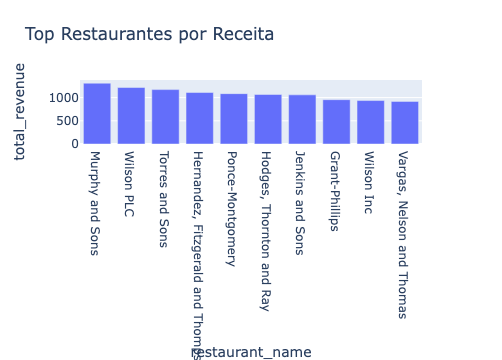

In [25]:
top_restaurants = df.groupby('restaurant_name')['total_revenue'].sum().reset_index().sort_values(by='total_revenue', ascending=False).head(10)

print("Top 10 Restaurantes por Receita:")
print(top_restaurants)

plt.figure(figsize=(10,5))
plt.bar(top_restaurants['restaurant_name'], top_restaurants['total_revenue'], color='darkcyan')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Restaurantes por Receita')
plt.ylabel('Receita Total')
plt.tight_layout()
plt.show()

fig = px.bar(top_restaurants, x='restaurant_name', y='total_revenue', title='Top Restaurantes por Receita')
fig.show()